In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [6]:
#  1. Get the total rides for each city type
total_ridesxtype = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ridesxtype.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2. Get the total drivers for each city type
total_driversxtype = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driversxtype.head()


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
total_faresxtype = pyber_data_df.groupby(["type"]).sum()["fare"]
total_faresxtype.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
avg_farextype = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_farextype.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
avg_farexdriver = total_faresxtype  / total_driversxtype 
avg_farexdriver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = pd.DataFrame(
    { "Total Rides": total_ridesxtype,
      "Total Drivers": total_driversxtype,
      "Total Fares": total_faresxtype,
      "Average Fare per Ride": avg_farextype,
      "Average Fare per Driver": avg_farexdriver})
pyber_summary.head() 

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary.index.name = None
pyber_summary.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [15]:
#  8. Format the columns.

format_mapping = {"Total Drivers": '{:,}', "Total Fares": "{:,.0f}", "Average Fare per Ride": '${:,.2f}', "Average Fare per Driver": '${:,.2f}'}
pyber_summary.style.format(format_mapping)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"4,328",$34.62,$55.49
Suburban,625,490,"19,356",$30.97,$39.50
Urban,1625,"2,405","39,854",$24.53,$16.57


In [16]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
daily_farextype = pyber_data_df.groupby(['type', 'date']).sum()['fare']
daily_farextype

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [18]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
daily_farextype = daily_farextype.reset_index()
daily_farextype.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
daily_farextype_pivot = daily_farextype.pivot(index ='date', columns ='type', values = 'fare')
daily_farextype_pivot.head()

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [25]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
slice_daily_farextype_pivot = daily_farextype_pivot.loc['2019-01-01':'2019-04-29', :]
slice_daily_farextype_pivot

type,Rural,Suburban,Urban
date,,,


In [21]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
slice_daily_farextype_pivot.index = pd.to_datetime(slice_daily_farextype_pivot.index)

In [22]:
# 7. Check that the datatype for the index is datetime using df.info()
slice_daily_farextype_pivot.info()
slice_daily_farextype_pivot.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


type,Rural,Suburban,Urban
date,,,


In [23]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
JanMay_weekly_farextype = slice_daily_farextype_pivot.resample('W').sum()
JanMay_weekly_farextype

type,Rural,Suburban,Urban
date,,,


ValueError: zero-size array to reduction operation fmin which has no identity

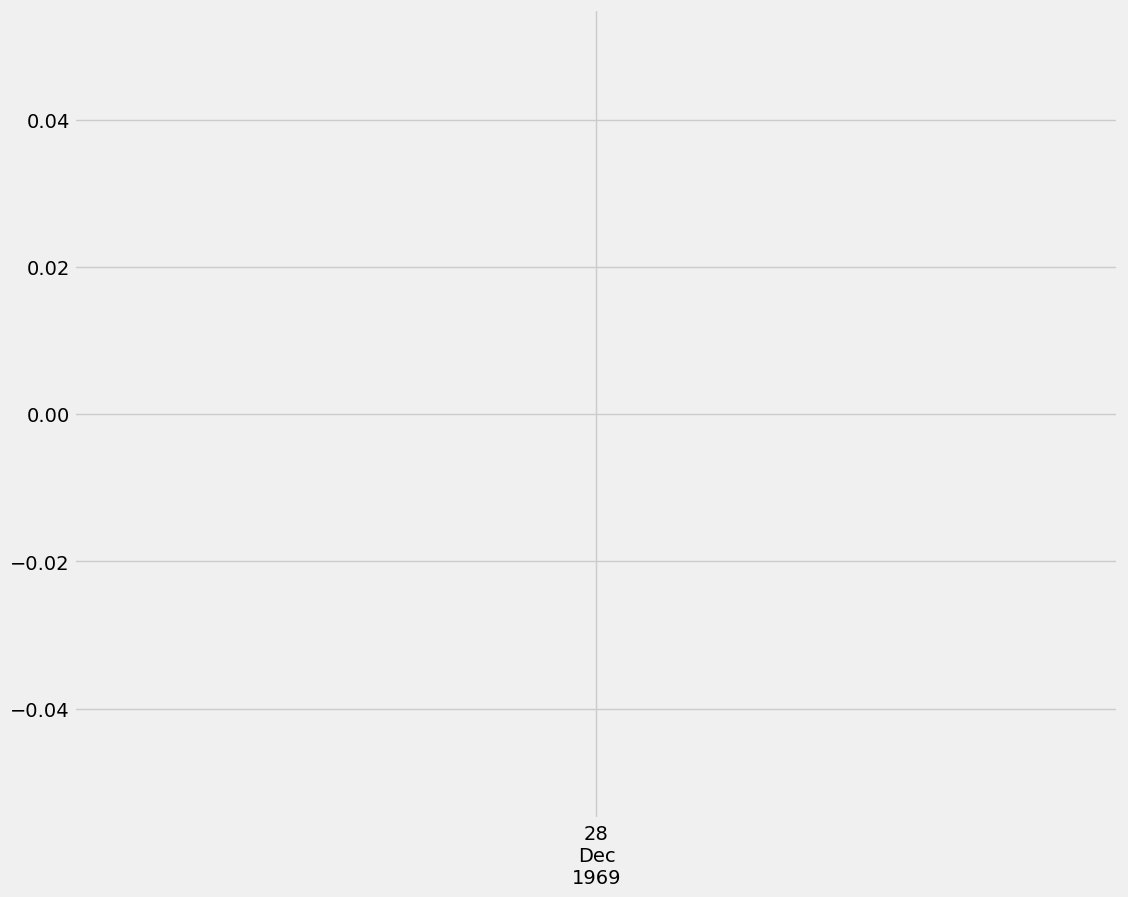

In [24]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

JanMay_weekly_farextype.plot(figsize=(12, 10))

plt.title('Weekly Fares by City Type')
plt.ylabel('Fare ($USD)')
plt.xlabel('')
plt.subplots_adjust(bottom=0.15)
